In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data Collection: Load customer data from CSV
file_path = 'customer_data.csv'  # Replace with your file path
customer_data = pd.read_csv(file_path)

In [3]:
print(customer_data.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [4]:
# Check for missing values
print(customer_data.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [6]:
# For simplicity, we drop rows with missing values (You can also choose to fill them)
customer_data.dropna(inplace=True)

# Feature scaling (for clustering to work efficiently)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Age','Spending_Score']])



In [7]:
# Use the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

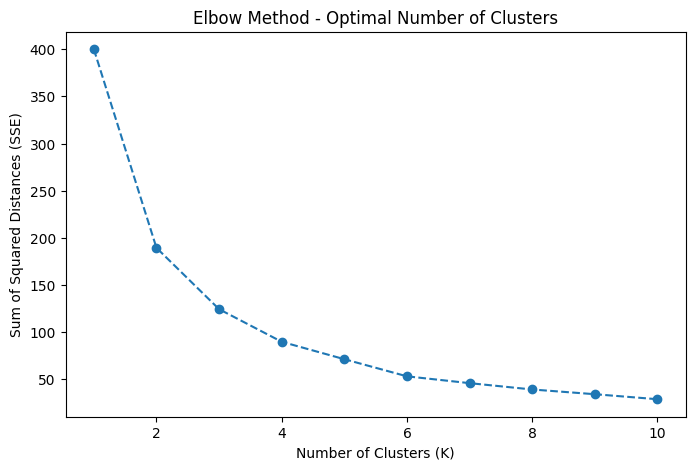

In [8]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [9]:
# Apply K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


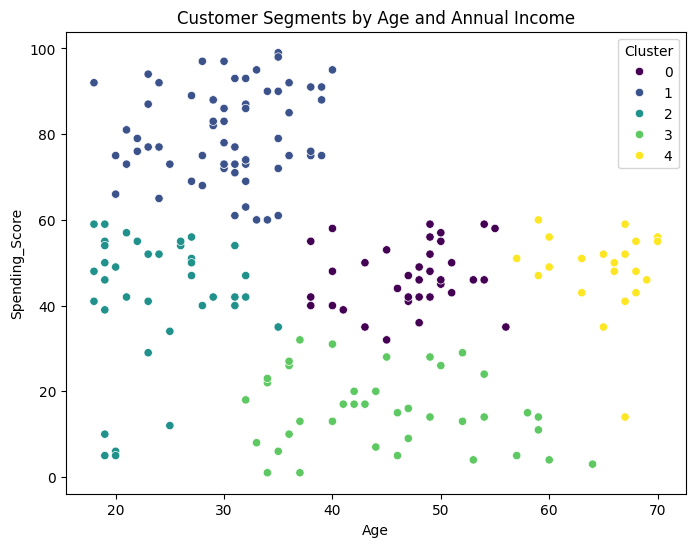

In [11]:
# Visualizing the clusters on Age vs. Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Age'], y=customer_data['Spending_Score'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segments by Age and Annual Income')
plt.show()

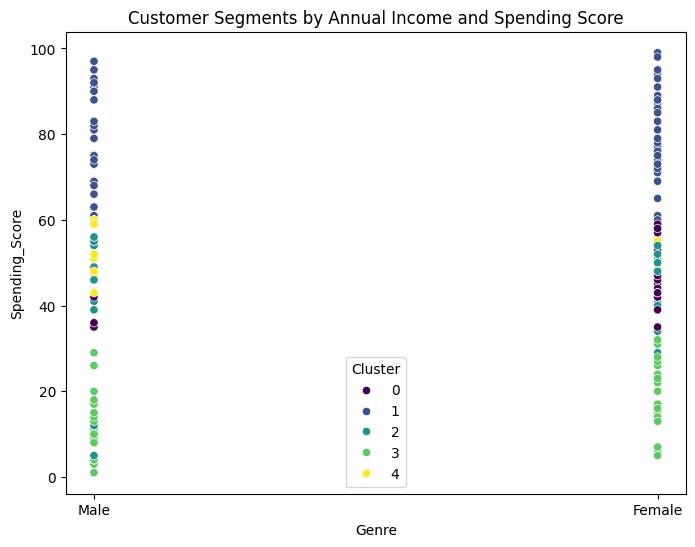

In [14]:
# Visualizing the clusters on Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Genre'], y=customer_data['Spending_Score'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segments by Annual Income and Spending Score')
plt.show()

In [16]:
# Descriptive statistics for each cluster (excluding non-numeric columns)
print(customer_data.groupby('Cluster').mean(numeric_only=True))

         CustomerID        Age  Annual_Income_(k$)  Spending_Score
Cluster                                                           
0         91.555556  47.138889           57.250000       46.444444
1        109.546875  30.140625           63.750000       80.156250
2         85.631579  24.131579           53.789474       41.842105
3        119.829268  45.439024           69.390244       15.536585
4         77.428571  64.952381           51.523810       48.142857
